# PRACTICA 2: REGRESIÓN LINEAL MULTIPLE

 Importación de librerias

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

Cargamos el dataset desde el archivo de CSV

In [8]:
data_path = 'C:/Users/Miki/Documents/ING MATEMATICA/CURSO 3/SEGUNDO CUATRI/MINERIA/LAB-4/wine_alcohol.csv'
wine_data = pd.read_csv(data_path, sep=';')

Verificamos la información del dataset, valores nulos y duplicados, lo cual es esencial para asegurar la calidad de los datos antes de cualquier análisis.

In [9]:
# Mostrar información inicial para diagnóstico
print("Información inicial del dataset:")
print(wine_data.info())

# Comprobar valores nulos
print("\nValores nulos en el dataset:")
print(wine_data.isnull().sum())

# Eliminar filas con valores nulos, si los hay
if wine_data.isnull().any(axis=None):
    print("\nLimpiando valores nulos...")
    wine_data.dropna(inplace=True)
    print("Valores nulos después de la limpieza:")
    print(wine_data.isnull().sum())

# Comprobar duplicados
print("\nNúmero de duplicados en el dataset:")
print(wine_data.duplicated().sum())

# Eliminar duplicados, si los hay
if wine_data.duplicated().any():
    print("\nLimpiando duplicados...")
    wine_data.drop_duplicates(inplace=True)
    print("Duplicados después de la limpieza:")
    print(wine_data.duplicated().sum())

Información inicial del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 

El conjuto de datos incluye 6497 registros sin valores nulos ni duplicados, lo cual es excelente ya que significa que no hay necesidad de limpieza adicional relacionada con datos faltantes o repetidos. Esto proporciona una base sólida para el análisis estadístico

Dividimos el dataset en conjuntos de entrenamiento (train) y prueba (test).

In [10]:
# Dividir los datos en entrenamiento y prueba
train, test = train_test_split(wine_data, test_size=0.25, random_state=42)

print(f"Conjunto de entrenamiento: {train.shape} muestras")
print(f"Conjunto de prueba: {test.shape} muestras")

Conjunto de entrenamiento: (4872, 14) muestras
Conjunto de prueba: (1625, 14) muestras


Buscamos que variables son las que tienen mayor correlación con la variable 'alcohol' para crear uno de los modelos.

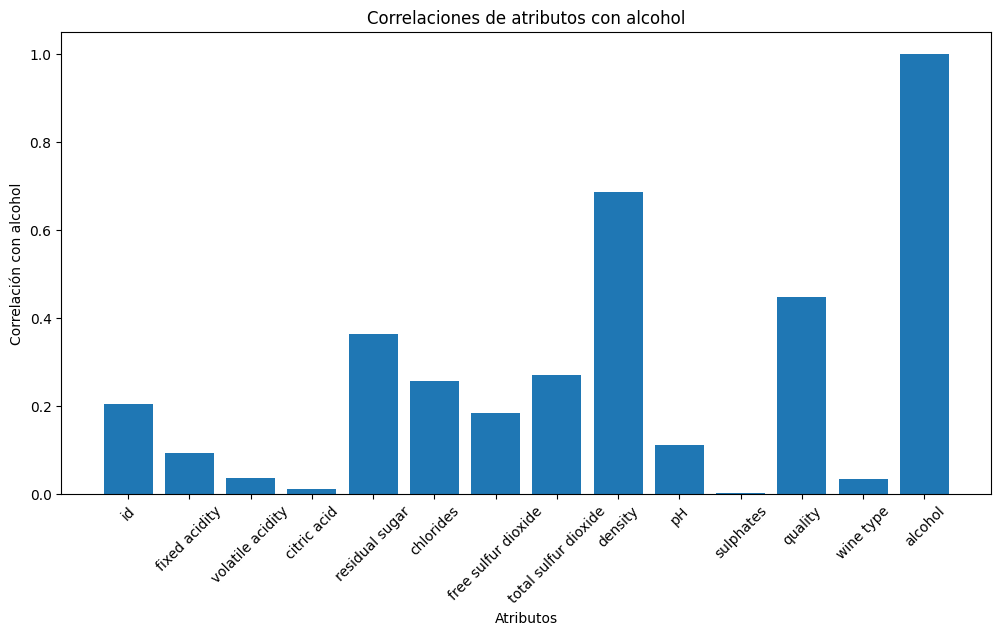

Los 4 atributos con mayor correlación con la columna 'alcohol' son:
- density
- quality
- residual sugar
- total sulfur dioxide
- chlorides


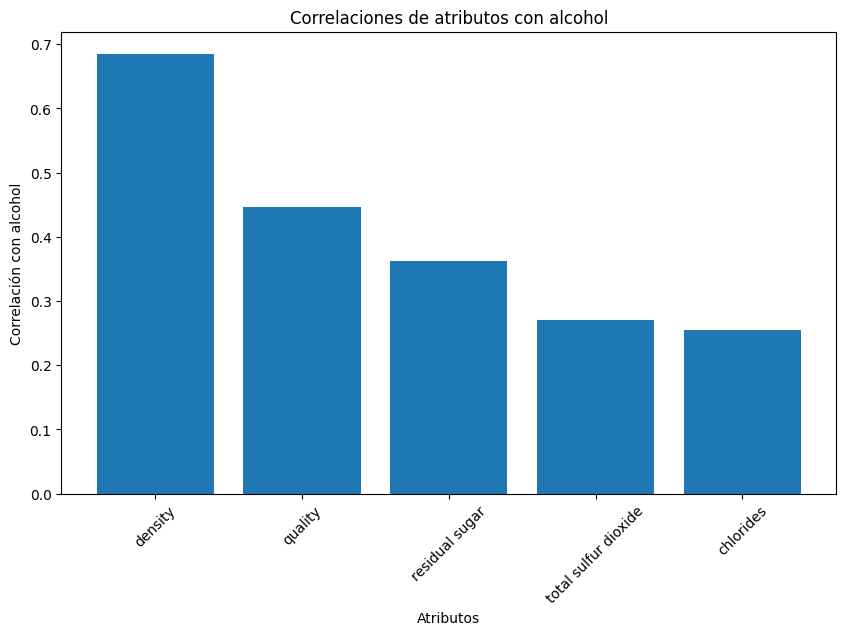

In [11]:
#Calcular la matriz de correlación
matriz_correlacion = train.corr()

# Obtener las correlaciones con respecto a la columna "alcohol"
correlaciones_alcohol = matriz_correlacion["alcohol"].abs()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(correlaciones_alcohol.index, correlaciones_alcohol)
plt.xlabel("Atributos")
plt.ylabel("Correlación con alcohol")
plt.title("Correlaciones de atributos con alcohol")
plt.xticks(rotation=45)
plt.show()

# Ordenar las correlaciones en orden descendente
top_atributos = correlaciones_alcohol.sort_values(ascending=False).index[1:6]

print("Los 4 atributos con mayor correlación con la columna 'alcohol' son:")
for attribute in top_atributos:
    print(f"- {attribute}")

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_atributos, correlaciones_alcohol[top_atributos])
plt.xlabel("Atributos")
plt.ylabel("Correlación con alcohol")
plt.title("Correlaciones de atributos con alcohol")
plt.xticks(rotation=45)
plt.show()

Con estas dos gráficas podemos observar que las variables 'density', 'quality', 'residual sugar', 'total sulfur dioxide', y 'chlorides' tienen la mayor correlación con 'alcohol'. Estos atributos son críticos para el modelo y su influencia en la predicción de 'alcohol'.

Crearemos dos modelos de regresión. En el primero emplearemos los 5 atributos con mayor correlación con el alcohol y en el segundo emplearemos todos.

In [12]:
# Seleccionar los atributos con mayor correlación
at_1 = ['density', 'quality', 'residual sugar', 'total sulfur dioxide', 'chlorides']
at_2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
               'pH', 'sulphates', 'quality', 'wine type']

# Crear un solo conjunto de entrenamiento y otro de prueba
X_combined = wine_data[at_1 + at_2]
y = wine_data['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Crear y entrenar los modelos de regresión
model_1 = LinearRegression()
model_2 = LinearRegression()
model_1.fit(X_train[at_1], y_train)
model_2.fit(X_train[at_2], y_train)

# Realizar predicciones con los modelos
y_pred_1 = model_1.predict(X_test[at_1])
y_pred_2 = model_2.predict(X_test[at_2])

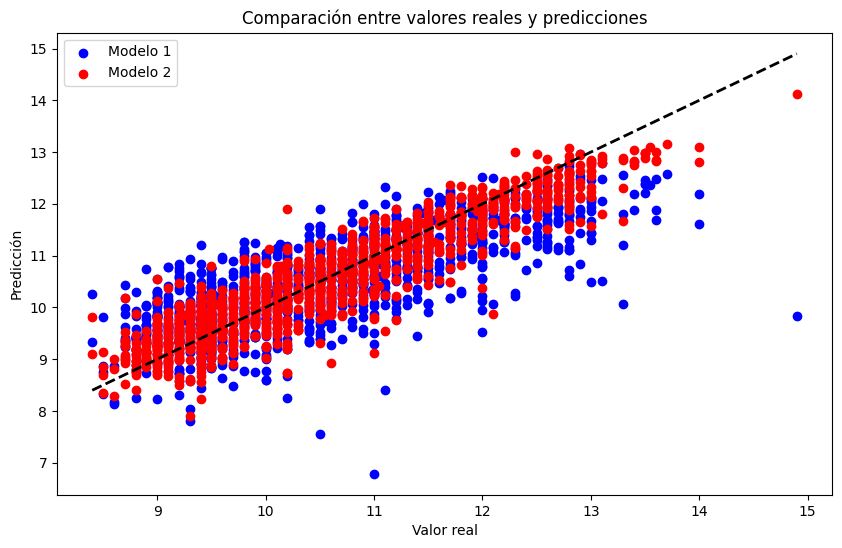

In [13]:
# Visualizar la progresión del modelo
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, color='blue', label='Modelo 1')
plt.scatter(y_test, y_pred_2, color='red', label='Modelo 2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Comparación entre valores reales y predicciones')
plt.legend()
plt.show()

Los puntos rojos (Modelo 2) tienden a estar más cerca de la línea y se distribuyen más uniformemente a lo largo de ella en comparación con los puntos azules (Modelo 1). Esto sugiere que el Modelo 2 tiene un mejor ajuste general que el Modelo 1.

In [14]:
 #Evaluar los modelos
y_pred_1 = model_1.predict(X_test[at_1])
y_pred_2 = model_2.predict(X_test[at_2])
mse_1 = mean_squared_error(y_test, y_pred_1)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f"Modelo 1 : MSE = {mse_1:.2f}")
print(f"Modelo 2 : MSE = {mse_2:.2f}")

Modelo 1 : MSE = 0.57
Modelo 2 : MSE = 0.20


 El Modelo 1 tiene un MSE de 0.57 mientras que el Modelo 2 tiene un MSE significativamente menor de 0.20. Un menor MSE indica que el Modelo 2 tiene un error cuadrático medio menor, lo que sugiere que es más preciso en sus predicciones.

In [15]:
r21 = r2_score(y_test, y_pred_1)

r22 = r2_score(y_test, y_pred_2)

print(f"R-squared modelo 1 (R²): {r21:.2f}")
print(f"R-squared modelo 2 (R²): {r22:.2f}")

R-squared modelo 1 (R²): 0.60
R-squared modelo 2 (R²): 0.86


El Modelo 1 tiene un R² de 0.60 y el Modelo 2 un R² de 0.86. Un valor de R² más alto indica que el Modelo 2 explica una mayor proporción de la variabilidad de la variable dependiente 'alcohol' en comparación con el Modelo 1, reforzando la idea de que el Modelo 2 es superior en términos de ajuste y precisión.

In [17]:
# Agregar una columna de intercepto a las matrices de características
X_train_intercept = sm.add_constant(X_train)
X_test_intercept = sm.add_constant(X_test)

# Crear y ajustar un modelo de regresión lineal utilizando statsmodels
sm_model = sm.OLS(y_train, X_train_intercept).fit()

# Calcular los intervalos de confianza para los coeficientes con un nivel de confianza del 75%
confidence_interval_75 = sm_model.conf_int(alpha=0.25)

print("Intervalos de confianza para cada coeficiente (75% de confianza):")
print(confidence_interval_75)

Intervalos de confianza para cada coeficiente (75% de confianza):
                               0           1
const                 634.455244  648.469529
density              -327.023770 -319.886162
quality                 0.050701    0.061661
residual sugar          0.110751    0.114601
total sulfur dioxide   -0.000281    0.000014
chlorides              -0.584003   -0.282438
fixed acidity           0.493914    0.516599
volatile acidity        0.741632    0.890713
citric acid             0.483851    0.626184
residual sugar          0.110751    0.114601
chlorides              -0.584003   -0.282438
free sulfur dioxide    -0.004353   -0.002945
total sulfur dioxide   -0.000281    0.000014
density              -327.023770 -319.886162
pH                      2.470396    2.609538
sulphates               0.907976    1.042051
quality                 0.050701    0.061661
wine type              -1.174353   -1.078303


Los intervalos de confianza del 75% para los coeficientes revelan la precisión de las estimaciones:
- Variables como 'density', 'chlorides', y 'sulphates' mostraron fuertes relaciones negativas o positivas con 'alcohol'.

- Algunos coeficientes como los del 'total sulfur dioxide' mostraron intervalos cruzando cero, sugiriendo posibles no significancias.

Coeficientes significativos indican cómo variables como la acidez (fija y volátil), el pH, y los sulfatos aumentan el contenido de alcohol, mientras que otros como 'chlorides' y 'density' tienen efectos negativos.
Los intervalos de confianza estrechos y alejados de cero refuerzan la confianza en la influencia significativa de estas variables.

# CONCLUSIONES

El valor de R² es una medida de cuánta variabilidad en la variable dependiente (en este caso, el contenido de alcohol) puede ser explicada por las variables independientes en el modelo. Un R² de 0.86 en el Modelo 2 significa que el modelo puede explicar el 86% de la variabilidad, lo cual es sustancialmente más alto que el 60% explicado por el Modelo 1. Esto indica que el Modelo 2 tiene un mejor ajuste general y es más efectivo al capturar las relaciones en los datos.

Además, el MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrada media entre los valores observados y los valores predichos. Un MSE más bajo, como el obtenido en el Modelo 2, indica que las predicciones del modelo son más cercanas a los valores reales, lo cual refleja una mayor precisión en las predicciones.

El Modelo 2 no solo proporciona una mejor medida de ajuste estadístico, sino que también ofrece predicciones más precisas y confiables sobre el contenido de alcohol en los vinos.
